<a href="https://colab.research.google.com/github/jmbaek/DNABERT/blob/master/DNABERT_run.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/jerryji1993/DNABERT

Cloning into 'DNABERT'...
remote: Enumerating objects: 766, done.
remote: Counting objects: 100% (766/766), done.
remote: Compressing objects: 100% (529/529), done.
remote: Total 766 (delta 400), reused 552 (delta 214), pack-reused 0
Receiving objects: 100% (766/766), 11.78 MiB | 3.83 MiB/s, done.
Resolving deltas: 100% (400/400), done.


In [ ]:
%cd /content/DNABERT
!python -m pip install --editable .
!cd examples
!python3 -m pip install -r requirements.txt

/content/DNABERT
Obtaining file:///content/DNABERT
     |████████████████████████████████| 5.7 MB 3.2 MB/s 
     |████████████████████████████████| 132 kB 74.9 MB/s 
     |████████████████████████████████| 1.2 MB 57.7 MB/s 
     |████████████████████████████████| 895 kB 82.8 MB/s 
     |████████████████████████████████| 79 kB 9.9 MB/s 
     |████████████████████████████████| 8.6 MB 73.1 MB/s 
     |████████████████████████████████| 138 kB 92.5 MB/s 
     |████████████████████████████████| 127 kB 88.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Running setup.py develop for transformers
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
ERROR: Could not o

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# model files are at /content/gdrive/MyDrive/DNABERT/6-new-12w-0

Mounted at /content/gdrive


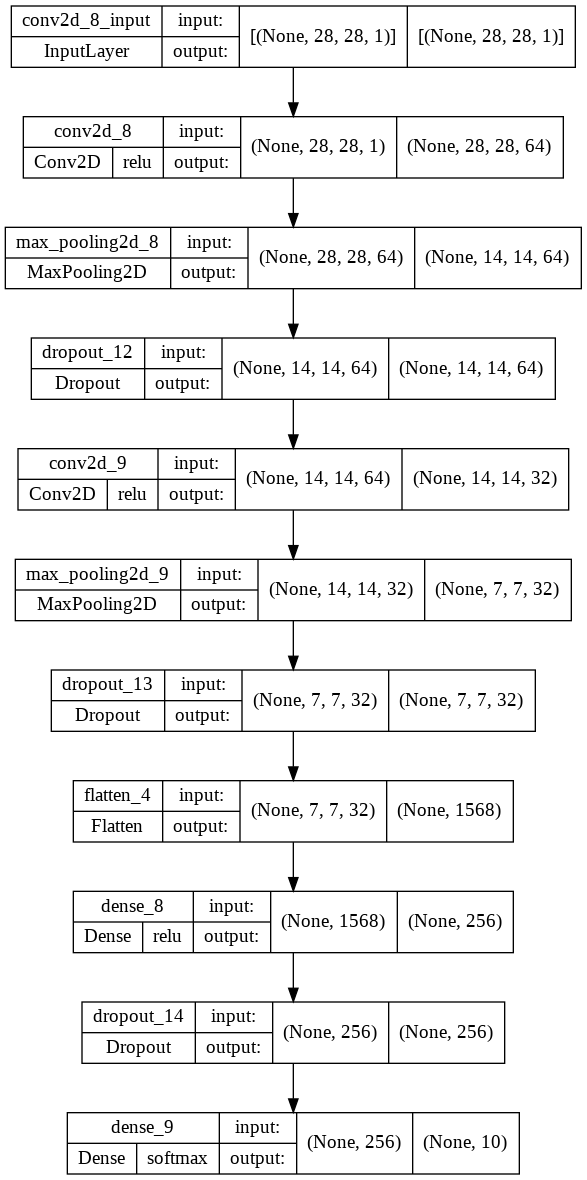

In [7]:
#Defining and compiling the keras model
import tensorflow as tf
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
    
#Compiling the model
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

from tensorflow.keras.utils import plot_model
plot_model(model, to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)



## New data prep for finetuning

In [2]:
import os
import pandas as pd
import numpy as np

def kmer2seq(kmers):
    """
    Convert kmers to original sequence
    
    Arguments:
    kmers -- str, kmers separated by space.
    
    Returns:
    seq -- str, original sequence.
    """
    kmers_list = kmers.split(" ")
    bases = [kmer[0] for kmer in kmers_list[0:-1]]
    bases.append(kmers_list[-1])
    seq = "".join(bases)
    assert len(seq) == len(kmers_list) + len(kmers_list[0]) - 1
    return seq

def seq2kmer(seq, k):
    """
    Convert original sequence to kmers
    
    Arguments:
    seq -- str, original sequence.
    k -- int, kmer of length k specified.
    
    Returns:
    kmers -- str, kmers separated by space
    """
    kmer = [seq[x:x+k] for x in range(len(seq)+1-k)]
    kmers = " ".join(kmer)
    return kmers


In [3]:
seq = "TACGATCGTAGCCATTCGCGTATATCGTCGATTATTACGATCGGGGCTAAACGGCTATCGCTAC"
seq2kmer(seq, 3)

'TAC ACG CGA GAT ATC TCG CGT GTA TAG AGC GCC CCA CAT ATT TTC TCG CGC GCG CGT GTA TAT ATA TAT ATC TCG CGT GTC TCG CGA GAT ATT TTA TAT ATT TTA TAC ACG CGA GAT ATC TCG CGG GGG GGG GGC GCT CTA TAA AAA AAC ACG CGG GGC GCT CTA TAT ATC TCG CGC GCT CTA TAC'

In [ ]:
!mkdir -p finetuned/6

!python /content/DNABERT/examples/run_finetune.py \
    --model_type dna \
    --tokenizer_name=dna6 \
    --model_name_or_path '/content/gdrive/MyDrive/DNABERT/6-new-12w-0' \
    --task_name dnaprom \
    --do_train \
    --do_eval \
    --data_dir /content/DNABERT/examples/sample_data/ft/6 \
    --max_seq_length 100 \
    --per_gpu_eval_batch_size=32   \
    --per_gpu_train_batch_size=32   \
    --learning_rate 2e-4 \
    --num_train_epochs 5.0 \
    --output_dir /content/DNABERT/finetuned/6 \
    --evaluate_during_training \
    --logging_steps 100 \
    --save_steps 4000 \
    --warmup_percent 0.1 \
    --hidden_dropout_prob 0.1 \
    --overwrite_output \
    --weight_decay 0.01 \
    --n_process 8

Streaming output truncated to the last 5000 lines.
Iteration:  32% 322/1012 [01:50<03:34,  3.22it/s]
Iteration:  32% 323/1012 [01:50<03:34,  3.22it/s]
Iteration:  32% 324/1012 [01:50<03:34,  3.20it/s]
Iteration:  32% 325/1012 [01:51<03:35,  3.19it/s]
Iteration:  32% 326/1012 [01:51<03:35,  3.19it/s]
Iteration:  32% 327/1012 [01:51<03:34,  3.20it/s]
Iteration:  32% 328/1012 [01:51<03:33,  3.21it/s]
Iteration:  33% 329/1012 [01:52<03:32,  3.21it/s]
Iteration:  33% 330/1012 [01:52<03:32,  3.22it/s]
Iteration:  33% 331/1012 [01:52<03:31,  3.22it/s]
Iteration:  33% 332/1012 [01:53<03:31,  3.22it/s]
Iteration:  33% 333/1012 [01:53<03:31,  3.22it/s]
Iteration:  33% 334/1012 [01:53<03:30,  3.21it/s]
Iteration:  33% 335/1012 [01:54<03:30,  3.21it/s]
Iteration:  33% 336/1012 [01:54<03:30,  3.21it/s]
Iteration:  33% 337/1012 [01:54<03:29,  3.21it/s]
Iteration:  33% 338/1012 [01:55<03:30,  3.21it/s]
Iteration:  33% 339/1012 [01:55<03:29,  3.21it/s]
Iteration:  34% 340/1012 [01:55<03:29,  3.21it/s]

In [ ]:
!cp -R /content/DNABERT/finetuned/6 '/content/gdrive/MyDrive/DNABERT/finetuned6'

## Prediction

In [ ]:
!mkdir -p prediction/6

!python /content/DNABERT/examples/run_finetune.py \
    --model_type dna \
    --tokenizer_name=dna6 \
    --model_name_or_path /content/gdrive/MyDrive/DNABERT/6-new-12w-0 \
    --task_name dnaprom \
    --do_predict \
    --data_dir /content/DNABERT/examples/sample_data/ft/6  \
    --max_seq_length 75 \
    --per_gpu_pred_batch_size=128   \
    --output_dir /content/DNABERT/finetuned/6 \
    --predict_dir /content/DNABERT/prediction \
    --n_process 48

04/05/2022 03:22:18 - WARNING - __main__ -   Process rank: -1, device: cuda, n_gpu: 1, distributed training: False, 16-bits training: False
04/05/2022 03:22:18 - INFO - transformers.configuration_utils -   loading configuration file /content/DNABERT/finetuned/6/config.json
04/05/2022 03:22:18 - INFO - transformers.configuration_utils -   Model config BertConfig {
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "do_sample": false,
  "eos_token_ids": 0,
  "finetuning_task": "dnaprom",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "is_decoder": false,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1
  },
  "layer_norm_eps": 1e-12,
  "length_penalty": 1.0,
  "max_length": 20,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "n

In [ ]:
!cp -R /content/DNABERT/prediction/6 '/content/gdrive/MyDrive/DNABERT/prediction6'